In [1]:
# basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import seaborn as sns
# ML and PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import silhouette_samples, silhouette_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
lem1 = pd.read_csv("../data/MS/Lemon_sample_1.csv", header=None)
# lem1 = pd.read_csv('./Lemon_sample_1.csv')
lem1.columns = ['mz', 'i1', 'i2', 'i3', 'i4', 'i5']

lime2 = pd.read_csv("../data/MS/Lime_sample_2.csv", header=None)
# lime2 = pd.read_csv("./Lime_sample_2.csv", header=None)
lime2.columns = ['mz', 'i1', 'i2', 'i3', 'i4', 'i5']

or3 = pd.read_csv("../data/MS/Orange_sample_3.csv", header=None)
# or3 = pd.read_csv("./Orange_sample_3.csv", header=None)
or3.columns = ['mz', 'i1', 'i2', 'i3', 'i4', 'i5']

tom4 = pd.read_csv("../data/MS/Tomato_sample_4.csv", header=None)
# tom4 = pd.read_csv("./Tomato_sample_4.csv", header=None)
tom4.columns = ['mz', 'i1', 'i2', 'i3', 'i4', 'i5']

# tom4

In [3]:
def plot_ms(df, ulim=400):

    no_plots = df.shape[1]-1

    fig, ax = plt.subplots(no_plots,1, figsize=(5,10))

    if no_plots == 1:
        i = df.columns[1]
        ax.plot(df.mz, df[i], label=i)
        ax.legend()
        # ax.set_xlim(10,ulim)

    else:
        for k, i in enumerate(df.iloc[:,1:].columns):
            # print(k,i)
            ax[k].plot(df.mz, df[i], label=i)
            ax[k].legend()
            ax[k].set_xlim(10,ulim)
    
    fig.tight_layout()

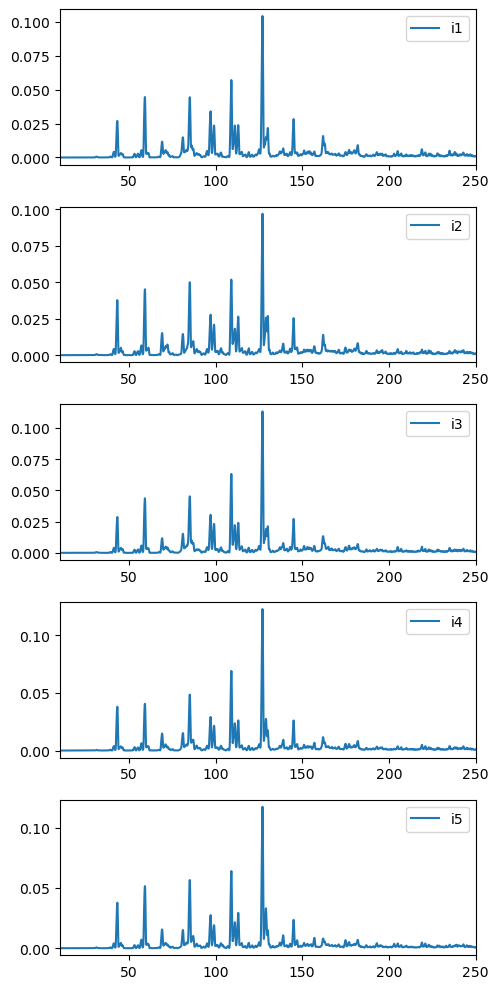

In [4]:
plot_ms(lem1, ulim=250)

In [5]:
# plot_ms(lime2, ulim=250)

In [6]:
# plot_ms(or3, ulim=300)

In [7]:
# plot_ms(tom4, ulim=300)

In [8]:
lem1['i1']

0        9.386688e-06
1        9.386688e-06
2        9.386688e-06
3        8.429838e-06
4        9.633747e-06
             ...     
39773    2.071736e-06
39774    8.101359e-07
39775    1.508652e-06
39776    1.620275e-06
39777    1.687993e-06
Name: i1, Length: 39778, dtype: float64

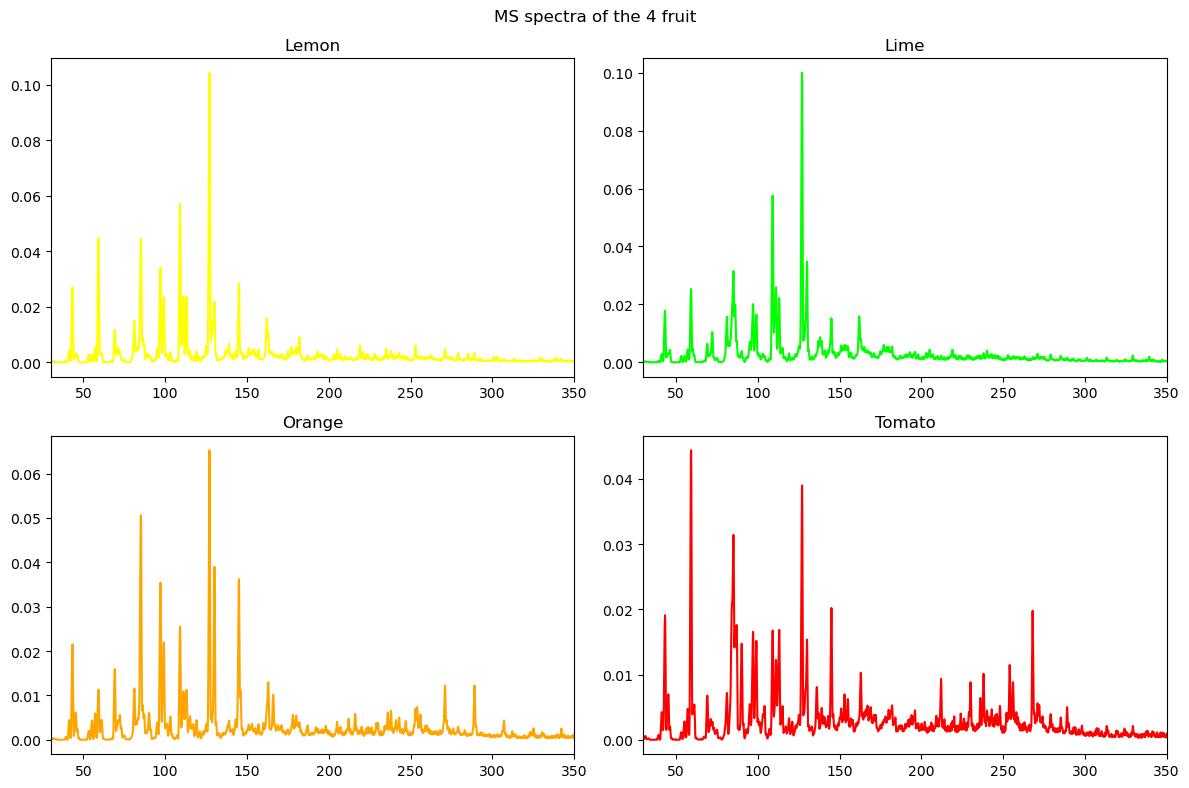

In [9]:
# plot the one spectra of each fruit together

fig, (ax0,ax1) = plt.subplots(2,2,figsize=(12,8))

ax00, ax01 = ax0
ax10, ax11 = ax1

ax00.plot(lem1.mz, lem1.i1, color='yellow')
ax00.set_title('Lemon')
ax00.set_xlim(30,350)

ax01.plot(lime2.mz, lime2.i1, color='lime')
ax01.set_title('Lime')
ax01.set_xlim(30,350)

ax10.plot(or3.mz, or3.i1, color='orange')
ax10.set_title('Orange')
ax10.set_xlim(30,350)

ax11.plot(tom4.mz, tom4.i1, color='red')
ax11.set_title('Tomato')
ax11.set_xlim(30,350)

fig.suptitle('MS spectra of the 4 fruit')
fig.tight_layout()

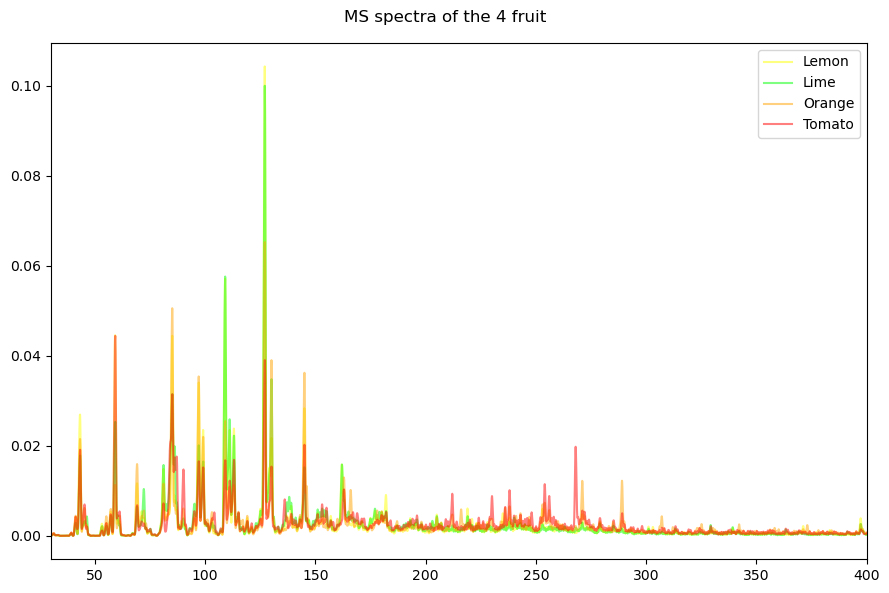

In [10]:
# plot the one spectra of each fruit together

fig, ax = plt.subplots(figsize=(9,6))

alpha=0.5

ax.plot(lem1.mz, lem1.i1, color='yellow', label='Lemon',alpha=alpha)
ax.plot(lime2.mz, lime2.i1, color='lime', label='Lime',alpha=alpha)
ax.plot(or3.mz, or3.i1, color='orange', label='Orange',alpha=alpha)
ax.plot(tom4.mz, tom4.i1, color='red', label='Tomato',alpha=alpha)

ax.legend()
ax.set_xlim(30,400)

fig.suptitle('MS spectra of the 4 fruit')
fig.tight_layout()

In [11]:
home = 'c:\\Users\\Andrew\\Desktop\\Modules\\Y3\\Y3 Sem2\\CHEM6164 AI and ML in Chemistry\\project'
os.chdir(home)
os.chdir(home+'./data/MS')
files = os.listdir()
# files
# os.getcwd()

In [12]:
# files

# PCA

In [13]:
print(lem1.columns[1:])
int_cols = lem1.columns[1:].tolist()
intensities = lem1[int_cols]
# intensities
mz = lem1.mz#.values.reshape(lem1.shape[0],1)
mz = pd.DataFrame(mz[:,np.newaxis],columns=['mz'])

Index(['i1', 'i2', 'i3', 'i4', 'i5'], dtype='object')


C:\Users\Andrew\AppData\Local\Temp\ipykernel_5244\2361652269.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mz = pd.DataFrame(mz[:,np.newaxis],columns=['mz'])


In [14]:
sc = StandardScaler()
sc_mz = pd.DataFrame(sc.fit_transform(mz), columns=['mz'])
sc_mz  # don't think we need this

mz
0     -1.732007
1     -1.731920
2     -1.731833
3     -1.731746
4     -1.731659
...         ...
39773  1.731659
39774  1.731746
39775  1.731833
39776  1.731920
39777  1.732007

[39778 rows x 1 columns]

In [15]:
sc = StandardScaler()
sc_intensities = pd.DataFrame(sc.fit_transform(intensities), columns=int_cols)
sc_intensities

i1        i2        i3        i4        i5
0     -0.165021 -0.170722 -0.157923 -0.149704 -0.150036
1     -0.165021 -0.170722 -0.157923 -0.149704 -0.150036
2     -0.165021 -0.170722 -0.157923 -0.149704 -0.150036
3     -0.165341 -0.169968 -0.157181 -0.149256 -0.150715
4     -0.164939 -0.169503 -0.157686 -0.149594 -0.150411
...         ...       ...       ...       ...       ...
39773 -0.167468 -0.172371 -0.161042 -0.150898 -0.151654
39774 -0.167890 -0.171686 -0.160857 -0.150909 -0.151555
39775 -0.167656 -0.171788 -0.160678 -0.150093 -0.151318
39776 -0.167619 -0.170934 -0.161053 -0.150866 -0.151414
39777 -0.167596 -0.171720 -0.160926 -0.151241 -0.151816

[39778 rows x 5 columns]

In [16]:
# sc_intensities.T

In [17]:
# sc_lem1 = pd.concat([lem1.mz,sc_intensities],axis=1)
sc_lem1 = pd.concat([sc_mz,sc_intensities],axis=1)
sc_lem1
# plot_ms(sc_lem1, ulim=2) # FIX limits! HERE

mz        i1        i2        i3        i4        i5
0     -1.732007 -0.165021 -0.170722 -0.157923 -0.149704 -0.150036
1     -1.731920 -0.165021 -0.170722 -0.157923 -0.149704 -0.150036
2     -1.731833 -0.165021 -0.170722 -0.157923 -0.149704 -0.150036
3     -1.731746 -0.165341 -0.169968 -0.157181 -0.149256 -0.150715
4     -1.731659 -0.164939 -0.169503 -0.157686 -0.149594 -0.150411
...         ...       ...       ...       ...       ...       ...
39773  1.731659 -0.167468 -0.172371 -0.161042 -0.150898 -0.151654
39774  1.731746 -0.167890 -0.171686 -0.160857 -0.150909 -0.151555
39775  1.731833 -0.167656 -0.171788 -0.160678 -0.150093 -0.151318
39776  1.731920 -0.167619 -0.170934 -0.161053 -0.150866 -0.151414
39777  1.732007 -0.167596 -0.171720 -0.160926 -0.151241 -0.151816

[39778 rows x 6 columns]

In [18]:
sc_intensities.describe().T

count          mean       std       min       25%       50%       75%  \
i1  39778.0 -1.334025e-15  1.000013 -0.167890 -0.167384 -0.167135 -0.152782   
i2  39778.0 -1.512225e-15  1.000013 -0.172371 -0.171381 -0.171068 -0.156570   
i3  39778.0  1.259621e-15  1.000013 -0.161053 -0.160586 -0.160377 -0.147578   
i4  39778.0  2.131879e-16  1.000013 -0.151434 -0.150954 -0.150751 -0.140157   
i5  39778.0 -5.525249e-16  1.000013 -0.151816 -0.151327 -0.151119 -0.139637   

          max  
i1  34.693771  
i2  33.028744  
i3  36.100724  
i4  36.832639  
i5  35.308305

In [19]:
sc_intensities.T

0         1         2         3         4         5         6      \
i1 -0.165021 -0.165021 -0.165021 -0.165341 -0.164939 -0.165832 -0.165539   
i2 -0.170722 -0.170722 -0.170722 -0.169968 -0.169503 -0.170823 -0.169478   
i3 -0.157923 -0.157923 -0.157923 -0.157181 -0.157686 -0.158076 -0.158522   
i4 -0.149704 -0.149704 -0.149704 -0.149256 -0.149594 -0.149712 -0.150318   
i5 -0.150036 -0.150036 -0.150036 -0.150715 -0.150411 -0.150516 -0.151028   

       7         8         9      ...     39768     39769     39770     39771  \
i1 -0.165525 -0.165546 -0.165549  ... -0.167647 -0.167661 -0.167677 -0.167659   
i2 -0.170019 -0.170026 -0.170116  ... -0.171659 -0.171723 -0.171713 -0.171784   
i3 -0.158277 -0.158363 -0.158448  ... -0.160821 -0.160820 -0.160808 -0.160847   
i4 -0.149748 -0.149754 -0.149783  ... -0.151083 -0.151051 -0.150986 -0.150952   
i5 -0.150621 -0.150638 -0.150660  ... -0.151558 -0.151538 -0.151497 -0.151505   

       39772     39773     39774     39775     39776     39777  
i1 -0.167837 -0.167468 -0.167890 -0.167656 -0.167619 -0.167596  
i2 -0.171898 -0.172371 -0.171686 -0.171788 -0.170934 -0.171720  
i3 -0.160707 -0.161042 -0.160857 -0.160678 -0.161053 -0.160926  
i4 -0.151434 -0.150898 -0.150909 -0.150093 -0.150866 -0.151241  
i5 -0.151472 -0.151654 -0.151555 -0.151318 -0.151414 -0.151816  

[5 rows x 39778 columns]

In [20]:
# n_components=5
# pca = PCA(n_components=n_components)
# # x = pca.fit_transform(sc_lem1[["mz","i1"]])
# x = pca.fit_transform(sc_intensities.T)
# print(sc_intensities.T.shape,x.shape)
# print(x)
# # sc_lem1[["mz","i1"]]['i1']
# # plot_ms(sc_lem1[["mz","i1"]]) # should I scale mz as well? probably

In [21]:
# var_ratios = pca.explained_variance_ratio_
# var_ratios

In [22]:
# np.cumsum(var_ratios) # makes wicked sense now

In [23]:
# plt.plot(x[1],x[0])
# x

In [24]:
# plt.plot(x[:,0],x[:,1], linewidth=0, marker='o')

In [25]:
# have to functionalise this now and do it for all datapoints
# files

In [26]:
base = pd.DataFrame([], columns=lem1.index.tolist()+['label'])
# base

for i, f in enumerate(files):
    # if i<2:
        label = f.split('_')[0]
        # print(label)

        input = pd.read_csv(f, header=None)
        input.columns = lem1.columns

        intensities = input.drop(['mz'], axis=1).T
        intensities['label'] = label

        base = pd.concat([base,intensities],axis=0).reset_index(drop=True)

base

0         1         2         3         4         5         6  \
0    0.000009  0.000009  0.000009  0.000008  0.000010  0.000007  0.000008   
1    0.000005  0.000005  0.000005  0.000007  0.000008  0.000005  0.000008   
2    0.000010  0.000010  0.000010  0.000013  0.000011  0.000010  0.000009   
3    0.000006  0.000006  0.000006  0.000008  0.000007  0.000006  0.000004   
4    0.000007  0.000007  0.000007  0.000004  0.000005  0.000005  0.000003   
..        ...       ...       ...       ...       ...       ...       ...   
235  0.000004  0.000004  0.000004  0.000000  0.000009  0.000004  0.000008   
236  0.000007  0.000007  0.000007  0.000004  0.000003  0.000005  0.000005   
237  0.000004  0.000004  0.000004  0.000006  0.000006  0.000002  0.000003   
238  0.000009  0.000009  0.000009  0.000001  0.000010  0.000003  0.000004   
239  0.000009  0.000009  0.000009  0.000008  0.000006  0.000006  0.000009   

            7         8         9  ...     39769     39770     39771  \
0    0.000008  0.000008  0.000008  ...  0.000001  0.000001  0.000002   
1    0.000007  0.000007  0.000007  ...  0.000002  0.000002  0.000002   
2    0.000009  0.000009  0.000009  ...  0.000001  0.000001  0.000001   
3    0.000006  0.000006  0.000006  ...  0.000002  0.000002  0.000002   
4    0.000005  0.000005  0.000004  ...  0.000002  0.000002  0.000002   
..        ...       ...       ...  ...       ...       ...       ...   
235  0.000006  0.000006  0.000006  ...  0.000002  0.000002  0.000002   
236  0.000005  0.000005  0.000006  ...  0.000003  0.000002  0.000002   
237  0.000004  0.000004  0.000004  ...  0.000003  0.000003  0.000003   
238  0.000005  0.000005  0.000005  ...  0.000003  0.000003  0.000002   
239  0.000008  0.000008  0.000008  ...  0.000002  0.000002  0.000002   

            39772         39773         39774     39775         39776  \
0    9.681495e-07  2.071736e-06  8.101359e-07  0.000002  1.620275e-06   
1    1.380807e-06  0.000000e+00  1.997703e-06  0.000002  4.193257e-06   
2    1.728047e-06  6.839992e-07  1.259683e-06  0.000002  6.478957e-07   
3    5.687599e-07  2.348353e-06  2.312679e-06  0.000005  2.453402e-06   
4    1.813078e-06  1.208086e-06  1.536073e-06  0.000002  2.002568e-06   
..            ...           ...           ...       ...           ...   
235  1.607769e-06  3.909781e-06  1.414922e-06  0.000002  1.376357e-06   
236  4.501533e-06  0.000000e+00  2.288693e-06  0.000001  0.000000e+00   
237  2.181133e-06  2.822717e-06  9.159607e-07  0.000004  1.831921e-06   
238  2.878179e-06  2.718003e-06  1.710508e-06  0.000004  0.000000e+00   
239  0.000000e+00  0.000000e+00  1.649991e-06  0.000002  1.910897e-06   

            39777   label  
0    1.687993e-06   Lemon  
1    1.900144e-06   Lemon  
2    1.044051e-06   Lemon  
3    1.209846e-06   Lemon  
4    6.732923e-07   Lemon  
..            ...     ...  
235  2.186300e-06  Tomato  
236  3.474669e-06  Tomato  
237  8.910122e-07  Tomato  
238  9.763385e-07  Tomato  
239  9.119664e-07  Tomato  

[240 rows x 39779 columns]

In [27]:
# scaling
intensities = base.drop(['label'],axis=1)
intensities.head()

0         1         2         3         4         5         6      \
0  0.000009  0.000009  0.000009  0.000008  0.000010  0.000007  0.000008   
1  0.000005  0.000005  0.000005  0.000007  0.000008  0.000005  0.000008   
2  0.000010  0.000010  0.000010  0.000013  0.000011  0.000010  0.000009   
3  0.000006  0.000006  0.000006  0.000008  0.000007  0.000006  0.000004   
4  0.000007  0.000007  0.000007  0.000004  0.000005  0.000005  0.000003   

      7         8         9      ...     39768     39769     39770     39771  \
0  0.000008  0.000008  0.000008  ...  0.000002  0.000001  0.000001  0.000002   
1  0.000007  0.000007  0.000007  ...  0.000002  0.000002  0.000002  0.000002   
2  0.000009  0.000009  0.000009  ...  0.000001  0.000001  0.000001  0.000001   
3  0.000006  0.000006  0.000006  ...  0.000002  0.000002  0.000002  0.000002   
4  0.000005  0.000005  0.000004  ...  0.000002  0.000002  0.000002  0.000002   

          39772         39773         39774     39775         39776  \
0  9.681495e-07  2.071736e-06  8.101359e-07  0.000002  1.620275e-06   
1  1.380807e-06  0.000000e+00  1.997703e-06  0.000002  4.193257e-06   
2  1.728047e-06  6.839992e-07  1.259683e-06  0.000002  6.478957e-07   
3  5.687599e-07  2.348353e-06  2.312679e-06  0.000005  2.453402e-06   
4  1.813078e-06  1.208086e-06  1.536073e-06  0.000002  2.002568e-06   

          39777  
0  1.687993e-06  
1  1.900144e-06  
2  1.044051e-06  
3  1.209846e-06  
4  6.732923e-07  

[5 rows x 39778 columns]

In [28]:
sc = StandardScaler()
sc_intensities = sc.fit_transform(intensities)
print(sc_intensities.shape)
pd.DataFrame(sc_intensities)

(240, 39778)


0         1         2         3         4         5         6      \
0    1.372097  1.372097  1.372097  1.414152  1.439082  1.023364  1.200636   
1   -0.513484 -0.513484 -0.513484  0.860956  0.918920 -0.103471  1.431920   
2    1.792727  1.792727  1.792727  3.085846  2.059943  2.390094  1.471267   
3    0.102800  0.102800  0.102800  1.166509  0.222491  0.709921 -0.172054   
4    0.208229  0.208229  0.208229 -0.188136 -0.332586  0.107735 -0.554244   
..        ...       ...       ...       ...       ...       ...       ...   
235 -0.720713 -0.720713 -0.720713 -1.869780  1.354303 -0.542621  1.218579   
236  0.490865  0.490865  0.490865 -0.494077 -1.241404  0.121898  0.172775   
237 -1.045284 -1.045284 -1.045284  0.620973 -0.245849 -1.316809 -0.711059   
238  1.315563  1.315563  1.315563 -1.468140  1.485813 -0.706817 -0.226309   
239  1.083815  1.083815  1.083815  1.345945 -0.225581  0.516966  1.593646   

        7         8         9      ...     39768     39769     39770  \
0    1.553995  1.519502  1.526753  ... -0.439873 -0.563276 -0.682393   
1    0.981029  0.966915  0.829731  ...  0.599708  0.181506  0.212109   
2    2.351990  2.205424  2.069506  ... -0.753170 -0.785864 -0.747698   
3    0.590266  0.573615  0.528166  ... -0.058457  0.087804  0.467994   
4   -0.272072 -0.312488 -0.347987  ... -0.458989 -0.376205 -0.148427   
..        ...       ...       ...  ...       ...       ...       ...   
235  0.454564  0.601620  0.639061  ...  0.691360  0.772776  0.955801   
236 -0.007277  0.127325  0.271072  ...  1.629824  1.569066  1.068853   
237 -0.609547 -0.586450 -0.640130  ...  2.305397  2.035060  1.901130   
238 -0.103719  0.011591  0.173665  ...  1.071190  1.526426  1.663524   
239  1.488406  1.706669  1.877415  ...  0.691993  0.483656  0.093348   

        39771     39772     39773     39774     39775     39776     39777  
0   -0.452309 -0.671894  0.499843 -0.838622 -0.981806  0.068246  0.172722  
1   -0.040227 -0.189872 -1.210250  0.537934 -0.820388  2.274510  0.436152  
2   -0.860555  0.215737 -0.645650 -0.317535 -0.723692 -0.765543 -0.626869  
3    0.840998 -1.138419  0.728174  0.903034  1.942350  0.782630 -0.420999  
4   -0.063006  0.315060 -0.213048  0.002840 -0.303929  0.396053 -1.087244  
..        ...       ...       ...       ...       ...       ...       ...  
235  1.092319  0.075241  2.017038 -0.137591 -0.947413 -0.140907  0.791476  
236  0.942584  3.455426 -1.210250  0.875231 -1.283926 -1.321096  2.391260  
237  1.924117  0.744983  1.119733 -0.715956  0.848726  0.249727 -0.816899  
238  1.427070  1.559197  1.033297  0.205034  1.124852 -1.321096 -0.710948  
239 -0.406506 -1.802783 -1.210250  0.134887 -0.882112  0.317447 -0.790880  

[240 rows x 39778 columns]

In [29]:
# simple pca
# n_components = 15
# pca = PCA(n_components=n_components)
# red_intensities = pca.fit_transform(sc_intensities)
# var_ratios = pca.explained_variance_ratio_

# print(sc_intensities.shape,red_intensities.shape)
# print(np.cumsum(var_ratios))
# print(pca.explained_variance_)

In [30]:
# finding idead no of components for linear PCA
comps = [2,3,5,20,50,100,150,200,240] # 10,15,20,25
variances = []

for n_c in comps:
    pca = PCA(n_components=n_c)
    x = pca.fit_transform(sc_intensities)
    var_ratios = pca.explained_variance_ratio_

    variances.append(var_ratios.sum())

# variances
# print(sc_intensities.shape,x.shape)
# pd.DataFrame(x)

summary = pd.DataFrame([comps, variances]).T
summary.columns = ['n_components','total_var']
summary

n_components  total_var
0           2.0   0.410434
1           3.0   0.450109
2           5.0   0.502678
3          20.0   0.589441
4          50.0   0.682970
5         100.0   0.802466
6         150.0   0.893124
7         200.0   0.963411
8         240.0   1.000000

(0.0, 240.0)

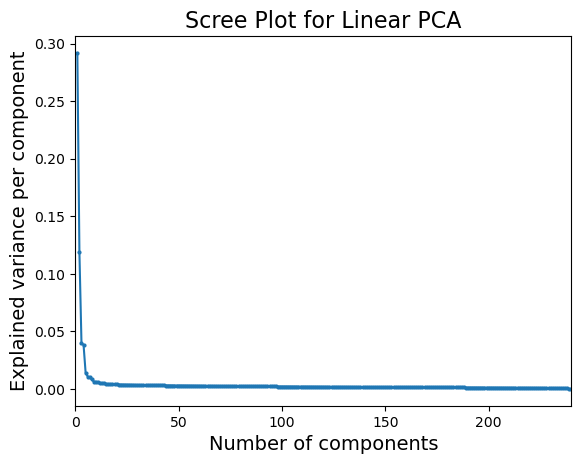

In [31]:
fig, ax = plt.subplots()
size=14
ax.plot(np.arange(1,var_ratios.shape[0]+1), var_ratios, marker='o', markersize=2)

ax.set_title('Scree Plot for Linear PCA', fontsize=size+2)
ax.set_xlabel('Number of components', fontsize=size)
ax.set_ylabel('Explained variance per component', fontsize=size)

ax.set_xlim(0,sc_intensities.shape[0])
# ax.set_ylim(summary.total_var[0],1)

In [32]:
summary

n_components  total_var
0           2.0   0.410434
1           3.0   0.450109
2           5.0   0.502678
3          20.0   0.589441
4          50.0   0.682970
5         100.0   0.802466
6         150.0   0.893124
7         200.0   0.963411
8         240.0   1.000000

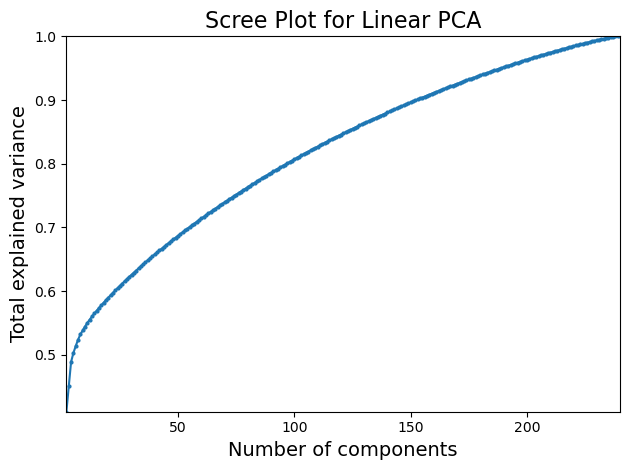

In [33]:
fig, ax = plt.subplots()
size=14
# ax.plot(summary.n_components, summary.total_var, marker='o')
ax.plot(np.arange(1,241), np.cumsum(var_ratios), marker='o', markersize=2)

ax.set_title('Scree Plot for Linear PCA', fontsize=size+2)
ax.set_xlabel('Number of components', fontsize=size)
ax.set_ylabel('Total explained variance', fontsize=size)

ax.set_xlim(2,sc_intensities.shape[0])
ax.set_ylim(summary.total_var[0],1)

fig.tight_layout()

In [34]:
# pd.DataFrame(pca.components_) # make HEATMAP (Pearson's correlation) along first 5 PCs and filter out mist important features

In [35]:
le = LabelEncoder()
le.fit(base['label'])
print(list(le.classes_))
y = le.transform(base['label'])
# y

['Lemon', 'Lime', 'Orange', 'Tomato']


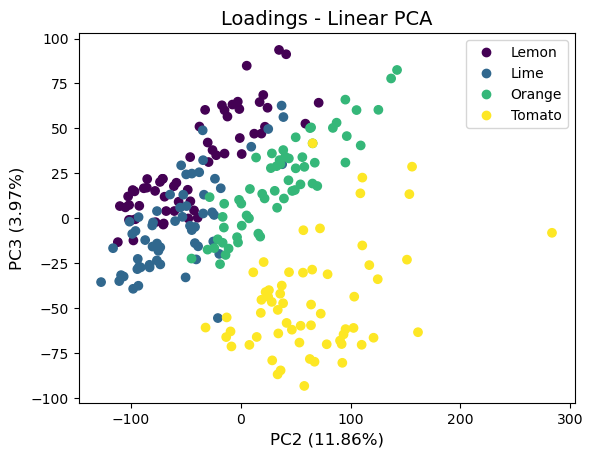

In [36]:
fig, ax = plt.subplots()
size = 12
ix = 1
iy = 2

scat = ax.scatter(x[:,ix],x[:,iy], c=y)
ax.legend(scat.legend_elements()[0], le.classes_)
ax.set_title('Loadings - Linear PCA', fontsize=size+2)

ax.set_xlabel('PC'+str(ix+1)+' ({}%)'.format(round(var_ratios[ix]*100,2)), fontsize=size)
ax.set_ylabel('PC'+str(iy+1)+' ({}%)'.format(round(var_ratios[iy]*100,2)), fontsize=size)

plt.show()

# lemon and lime are not very separable - makes sense
# show in report perhaps

In [37]:
# # need 3D plot - not really
# fig = plt.figure(figsize=(8,8))
# ax = plt.axes(projection='3d')

# scat = ax.scatter3D(x[:,0],x[:,1],x[:,2], c=y)
# ax.legend(scat.legend_elements()[0], le.classes_)

# # ax.scatter3D(x[:,0],x[:,1],x[:,2], c=y)

# b = 10 # boundary
# # ax.set_xlim(x[:,0].min()-b, x[:,0].max()+b)
# # ax.set_ylim(x[:,1].min()-b, x[:,1].max()+b)
# # ax.set_zlim(x[:,2].min()-b, x[:,2].max()+b)


# plt.show()

In [38]:
# tomato is most separable - makes sense, it's not a citrus fruit

## K-means clustering

In [39]:
n_pc = 150 # number of PCs selected
c = 4# number of clusters
kmeans4 = KMeans(n_clusters=c, random_state=0, n_init=100)
kmeans4.fit(x[:,0:n_pc])
# kmeans4.fit(x[:,1:n_pc])
centroids4 = kmeans4.cluster_centers_


c:\Users\Andrew\anaconda3\envs\DL_libraries\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [40]:
# x[:,0:n_pc].shape

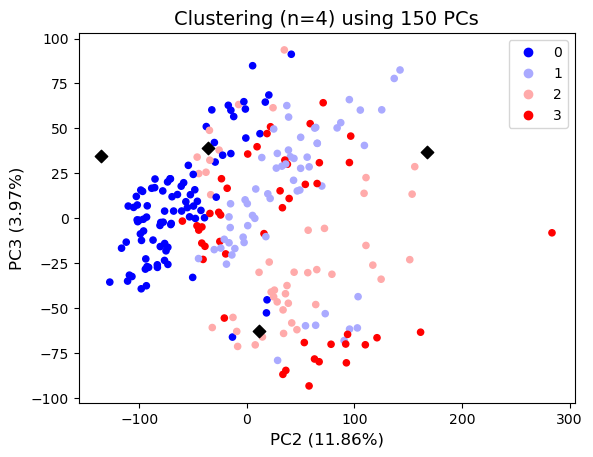

In [41]:
fig, ax = plt.subplots()
size = 12
ix = 1
iy = 2
s=20

scat = ax.scatter(x[:,ix],x[:,iy], c=kmeans4.labels_, cmap='bwr',s=20) # copper
# ax.legend(scat.legend_elements()[0], kmeans2.labels_)
ax.legend(scat.legend_elements()[0], set(kmeans4.labels_))

ax.set_title('Clustering (n={}) using {} PCs'.format(c, n_pc), fontsize=size+2)

ax.set_xlabel('PC'+str(ix+1)+' ({}%)'.format(round(var_ratios[ix]*100,2)), fontsize=size)
ax.set_ylabel('PC'+str(iy+1)+' ({}%)'.format(round(var_ratios[iy]*100,2)), fontsize=size)

ax.scatter(centroids4[:,0], centroids4[:,1], color='black', s=s*2, marker='D')

plt.show()

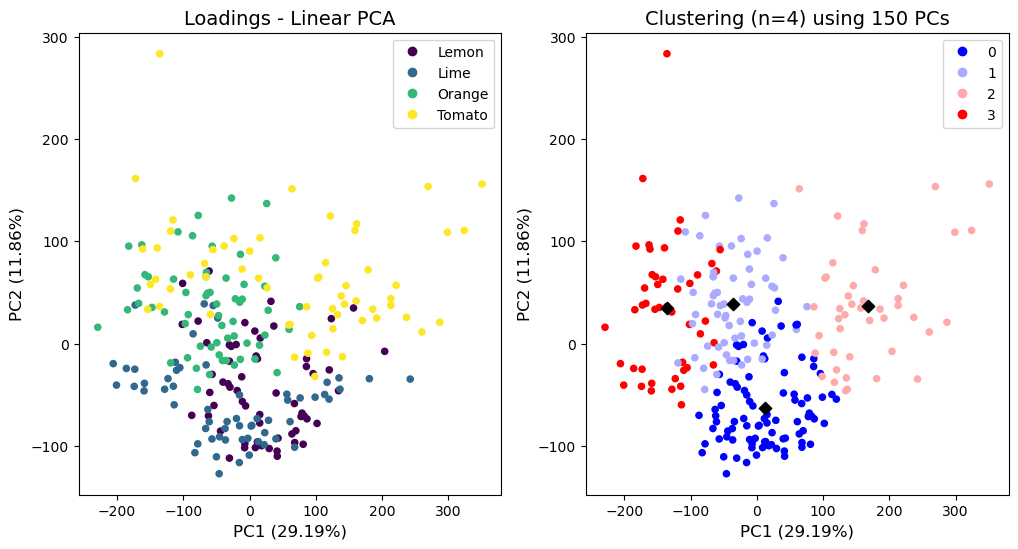

In [42]:
# side to side clusters vs reality
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(12,6))

size = 12
ix = 0
iy = 1
s=20

#left
scat0 = ax0.scatter(x[:,ix],x[:,iy], c=y, s=s)
ax0.legend(scat0.legend_elements()[0], le.classes_)
ax0.set_title('Loadings - Linear PCA', fontsize=size+2)

ax0.set_xlabel('PC'+str(ix+1)+' ({}%)'.format(round(var_ratios[ix]*100,2)), fontsize=size)
ax0.set_ylabel('PC'+str(iy+1)+' ({}%)'.format(round(var_ratios[iy]*100,2)), fontsize=size)

#right
scat1 = ax1.scatter(x[:,ix],x[:,iy], c=kmeans4.labels_, s=s, cmap='bwr') # copper, cmap='bwr'
ax1.legend(scat1.legend_elements()[0], set(kmeans4.labels_))

ax1.set_title('Clustering (n={}) using {} PCs'.format(c, n_pc), fontsize=size+2)

ax1.set_xlabel('PC'+str(ix+1)+' ({}%)'.format(round(var_ratios[ix]*100,2)), fontsize=size)
ax1.set_ylabel('PC'+str(iy+1)+' ({}%)'.format(round(var_ratios[iy]*100,2)), fontsize=size)

ax1.scatter(centroids4[:,0], centroids4[:,1], color='black', s=s*2, marker='D')

plt.show()

plt.show()

In [43]:
# once initial analysis is done
# need to plot mean cluster variance vs no of clusters
# calculate the Silhouette coeff. for what?

In [50]:
# testing sensitivity to n_pc
# let's use mean Silhouette score
number_pcs = [2,3,5,10,50,100,150,200,240]
average_silh_scores = []

for n_pc in number_pcs:
    # data = x[:,:n_pc]
    data = x[:,1:n_pc]

    kmeans4 = KMeans(n_clusters=4)
    kmeans4_labels = kmeans4.fit_predict(data)

    silhouette_avg = silhouette_score(data,kmeans4_labels)
    # print("For {} PCs the mean Silhouette score is {:.3f}".format(n_pc,silhouette_avg))
    average_silh_scores.append(silhouette_avg)

# pc_sensitivity = pd.DataFrame([pd.Series(number_pcs),pd.Series(average_silh_scores)]).T
pc_sensitivity = pd.DataFrame([pd.Series(number_pcs)-1,pd.Series(average_silh_scores)]).T
pc_sensitivity.columns = ['PCs','Mean Silhouette coeff']
pc_sensitivity

c:\Users\Andrew\anaconda3\envs\DL_libraries\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Andrew\anaconda3\envs\DL_libraries\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Andrew\anaconda3\envs\DL_libraries\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Andrew\anaconda3\envs\DL_libraries\lib\site-packages\sklearn\cluster\_

PCs  Mean Silhouette coeff
0    1.0               0.584897
1    2.0               0.453195
2    4.0               0.399256
3    9.0               0.344776
4   49.0               0.218833
5   99.0               0.157587
6  149.0               0.120462
7  199.0               0.104659
8  239.0               0.095380

In [51]:

# now what do i do w this

In [46]:
# look up cohesion and separation, CALCULATE for each n_pc  

c:\Users\Andrew\anaconda3\envs\DL_libraries\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters=2 the average silhouette_score is 0.211


c:\Users\Andrew\anaconda3\envs\DL_libraries\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters=3 the average silhouette_score is 0.219


c:\Users\Andrew\anaconda3\envs\DL_libraries\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters=4 the average silhouette_score is 0.219


c:\Users\Andrew\anaconda3\envs\DL_libraries\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters=5 the average silhouette_score is 0.214


c:\Users\Andrew\anaconda3\envs\DL_libraries\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters=6 the average silhouette_score is 0.169


c:\Users\Andrew\anaconda3\envs\DL_libraries\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters=7 the average silhouette_score is 0.170


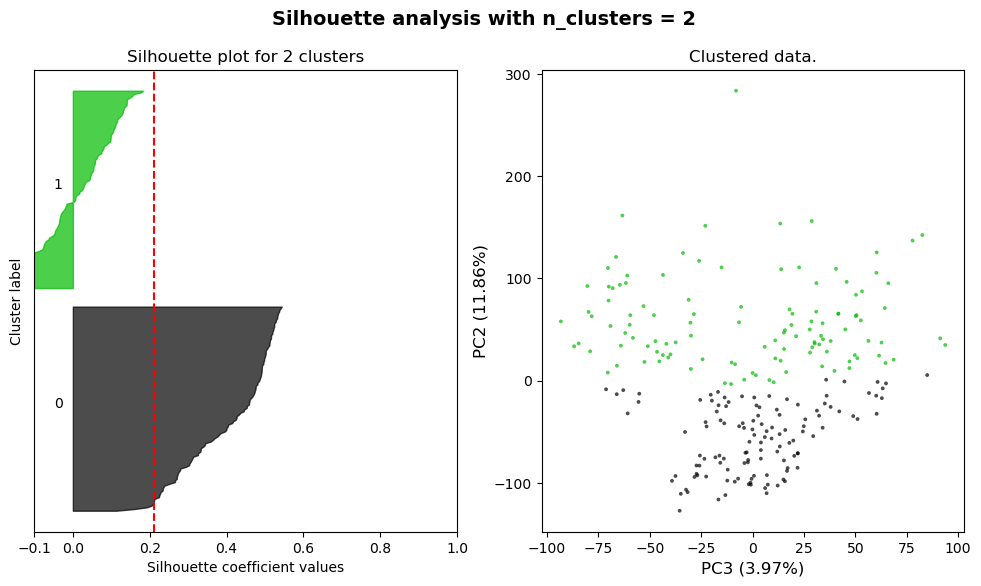

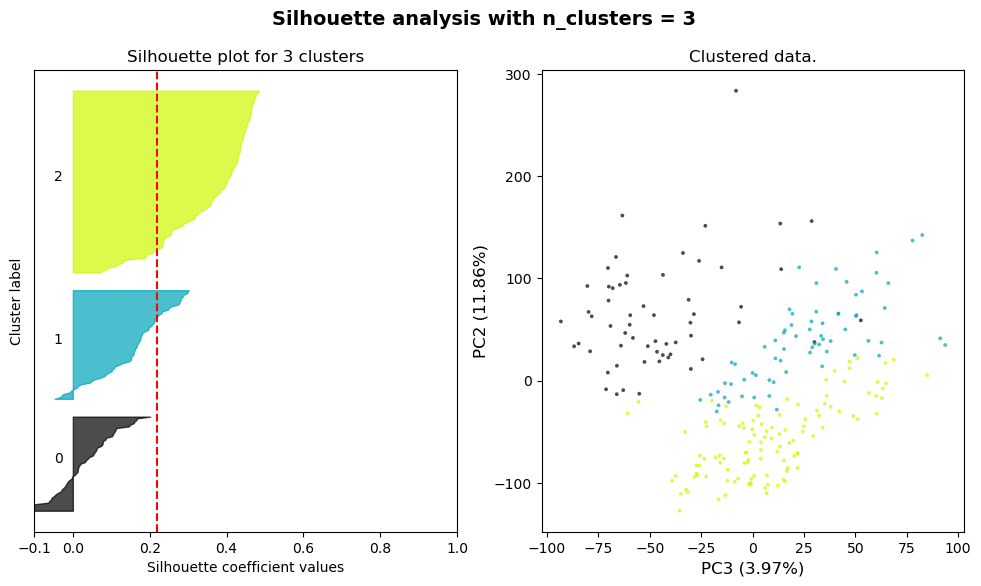

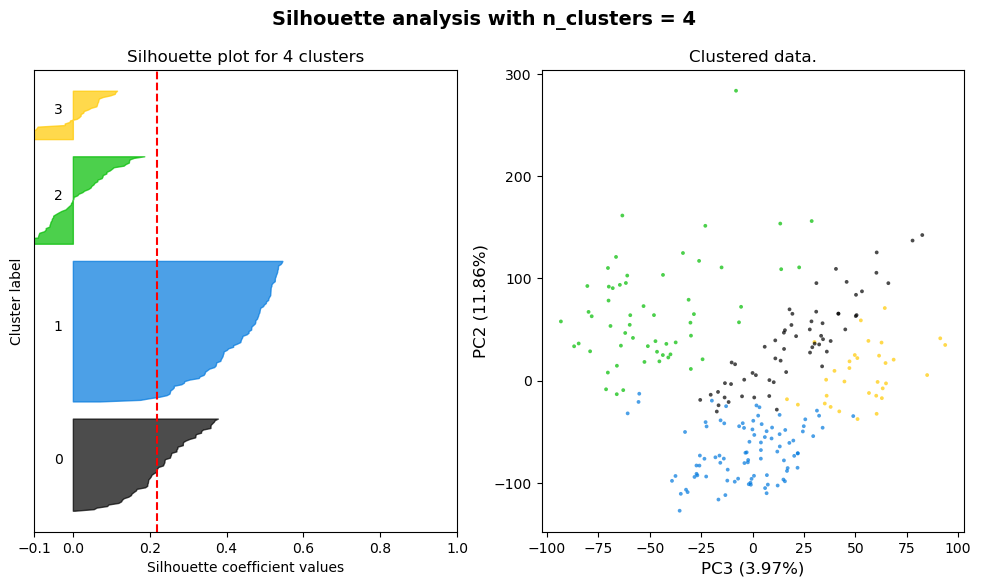

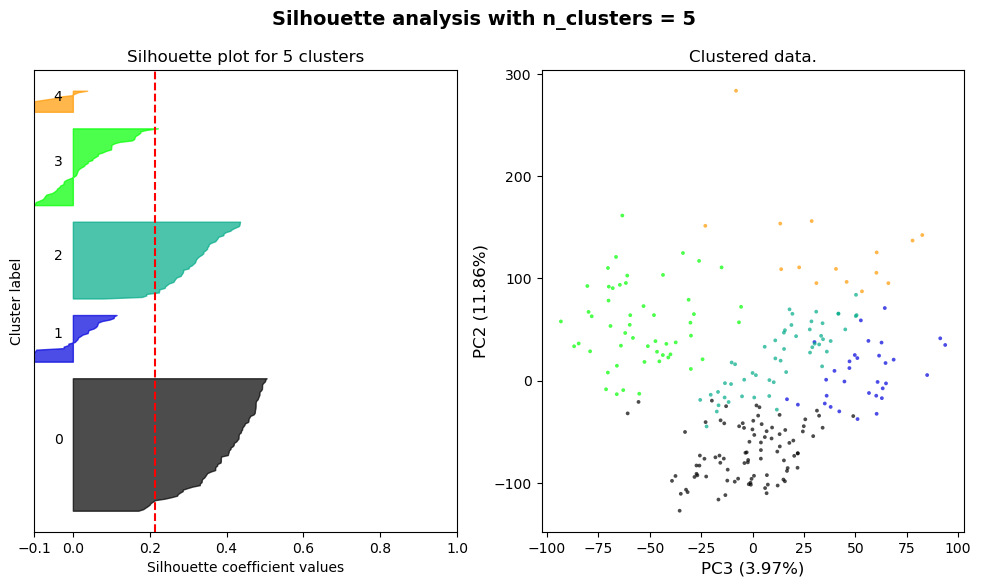

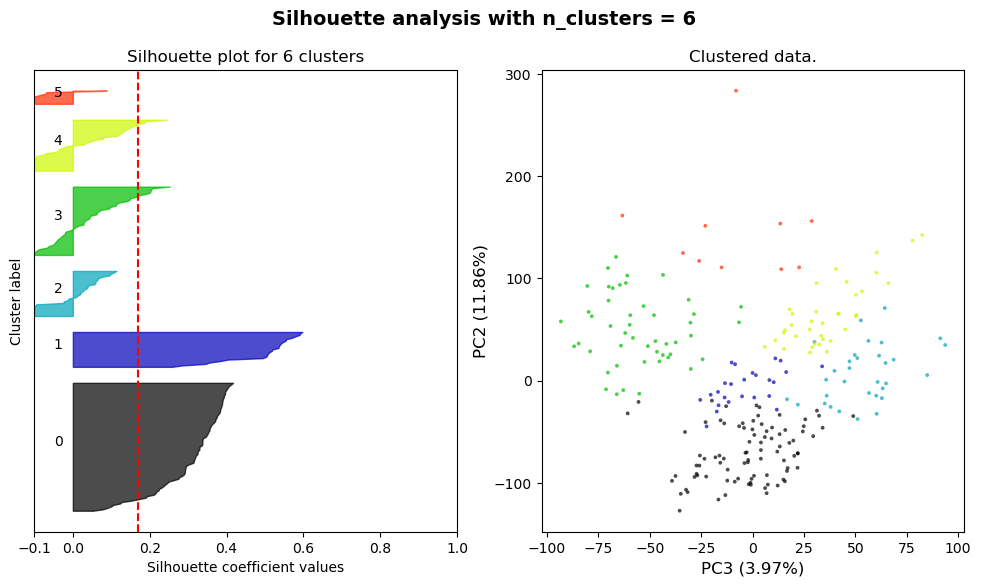

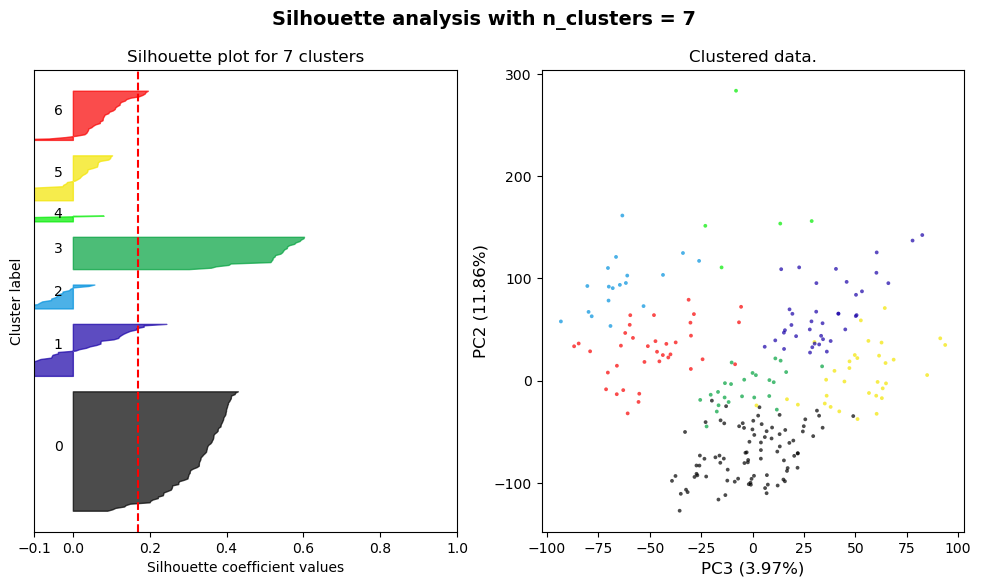

In [61]:
# testing the range of clusters
# source
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
range_n_clusters = [2,3,4,5,6,7]
n_pc = 50
ix = 2
iy = 1
k_sensitivities = []

data = x[:,:n_pc]
# data = x[:,1:n_pc]

for n_clusters in range_n_clusters:
    fig, (ax0,ax1) = plt.subplots(1,2, figsize=(12,6))

    ax0.set_xlim(-0.1,1)
    # ax0.set_ylim()

    clusterer = KMeans(n_clusters=n_clusters) #, n_init='auto', random_state=0)
    cluster_labels = clusterer.fit_predict(data)

    silhouette_avg = silhouette_score(data, cluster_labels)
    k_sensitivities.append(silhouette_avg)
    print('For n_clusters={} the average silhouette_score is {:.3f}'.format(n_clusters, silhouette_avg))

    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silh_vals = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silh_vals.sort()

        size_cluster_i = ith_cluster_silh_vals.shape[0]
        y_upper = y_lower + size_cluster_i

        colour = cm.nipy_spectral(float(i)/n_clusters)
        ax0.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silh_vals,facecolor=colour,edgecolor=colour,alpha=0.7)
        ax0.text(-0.05, y_lower+0.5*size_cluster_i,str(i))
        y_lower = y_upper+10

    ax0.set_title("Silhouette plot for {} clusters".format(n_clusters))
    ax0.set_xlabel('Silhouette coefficient values')
    ax0.set_ylabel('Cluster label')

    ax0.axvline(x=silhouette_avg,color='red',linestyle='--')
    ax0.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])
    ax0.set_yticks([])

    # right
    colours = cm.nipy_spectral(cluster_labels.astype(float)/n_clusters)
    ax1.scatter(x[:,x_pc],x[:,y_pc],marker='.',s=30,lw=00,alpha=0.7,c=colours,edgecolors='k')
    centroids = clusterer.cluster_centers_

    # ax1.scatter(centroids[:,0], centroids[:,1],marker='o',c='white',alpha=1,s=200,edgecolors='k')
    # for i, cl in enumerate(centroids):
    #     ax1.scatter(cl[0],cl[1],marker="$%d$" % i,alpha=1,s=50,edgecolors='k')

    ax1.set_title("Clustered data.")
    ax1.set_xlabel('PC'+str(ix+1)+' ({}%)'.format(round(var_ratios[ix]*100,2)), fontsize=size)
    ax1.set_ylabel('PC'+str(iy+1)+' ({}%)'.format(round(var_ratios[iy]*100,2)), fontsize=size)

    plt.suptitle("Silhouette analysis with n_clusters = %d" % n_clusters,fontsize=14,fontweight="bold")

plt.show()

In [62]:
sixc = pd.DataFrame([range_n_clusters,k_sensitivities]).T
sixc.columns = ['k','Mean Silhouette coeff']
sixc

k  Mean Silhouette coeff
0  2.0               0.211237
1  3.0               0.219158
2  4.0               0.218813
3  5.0               0.214015
4  6.0               0.168630
5  7.0               0.170437

In [49]:
stop

NameError: name 'stop' is not defined

# Supervised Leaning

In [63]:
# easily separable pair: orange-tomato
n_pc=100
data = pd.DataFrame(x[:,:n_pc])
data['target'] = y
data.head()

0          1          2          3          4          5  \
0   16.094147   5.408856  84.887254  42.785535 -14.562536 -26.989947   
1  156.798562  34.840072  93.669533  38.550391   5.551359 -31.788089   
2  -30.298452 -17.184604  62.859901  40.401261  10.867192 -18.722606   
3  -11.845835 -32.489293  60.313828  31.705150  31.549590 -21.023309   
4   11.927999 -14.788651  60.120589  43.083812  44.589319  -3.595940   

           6          7          8          9  ...        91         92  \
0 -30.688838 -17.008658 -29.245275  -9.175016  ...  0.854101  -5.905754   
1 -14.253383 -24.698600  10.096775   2.989515  ...  7.042587   4.552211   
2   3.788874  -8.694436 -28.887579 -27.212490  ... -5.973995   7.484505   
3  -9.289107 -21.877088 -20.383246 -21.556171  ... -5.370001   4.188463   
4 -12.316007 -33.688483 -19.234371  -0.658623  ...  1.962045  14.370990   

          93        94         95         96         97        98         99  \
0   4.712631 -9.094339  -5.172199 -12.995038   7.001008 -1.544132  -3.408860   
1   5.082221 -3.671016   8.540483  -0.736971  -6.484306 -2.863594   3.919931   
2 -20.114698  0.774160 -21.078751   5.646930  -9.684003  8.354222  -0.135437   
3   3.618365 -9.641329   4.409887   5.668800 -10.869276 -4.566070  14.043754   
4   1.858940 -9.622807 -10.114190 -17.017072 -11.871155  3.568616  17.729136   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

[5 rows x 101 columns]

In [64]:
print(le.classes_)
# le.inverse_transform([0,1,2,3])
# so lemon=0, lime=1, orange=2,tomato=3

['Lemon' 'Lime' 'Orange' 'Tomato']


In [65]:
# lemon and lime
nonsep_data = data[data.target<2] # non-separable
# orange and tomato
sep_data = data[data.target>1] # separable

### Separable case

In [66]:
sep_data.sample(5)
# sep_data.iloc[:,:-1]

0          1          2          3          4          5  \
154 -228.969275  15.978814  -8.538991 -33.431418   2.202938 -14.375681   
199 -135.710682  36.277948 -84.625833  19.970580  31.625398 -25.194030   
209  -67.743796  78.271393 -70.092528  26.385749  -2.824694 -26.039278   
189 -153.627968  33.546277 -86.847222  12.414092  31.242660 -26.588623   
186   13.380552  63.960831 -59.527271   4.595069  31.509408  15.032787   

             6          7         8          9  ...         91         92  \
154  13.254637   3.692419 -7.511504  -2.438055  ...   0.522636  -9.328656   
199   6.856105 -29.504625  0.745599  -7.609654  ...  21.568955   9.547569   
209  -3.756755  -7.881869  8.577565 -16.551395  ...   2.900836 -16.968165   
189   4.084382 -24.491757 -0.614547  -6.399563  ... -12.579251  12.078829   
186  -4.433460  -0.482534 -8.755338  -3.691722  ...  -8.136847  10.363990   

           93        94         95         96         97         98  \
154  0.327011 -6.826213   2.159664   5.985226  11.104811 -11.599242   
199 -6.037648 -5.925970  24.003054   7.941297   5.357627   8.570347   
209 -3.976267 -1.382180 -21.300587  -1.991601  10.620950   8.708726   
189 -3.668115 -3.716145  16.714658  23.770498 -14.559090  -2.754286   
186 -4.521206  4.398974  -7.241590  11.423685  -4.795813  10.278747   

            99  target  
154   1.859636       2  
199  18.915781       3  
209  -8.148000       3  
189 -10.239609       3  
186   7.115892       3  

[5 rows x 101 columns]

In [67]:
# building SVM for separable case
train_sep_X, test_sep_X, train_sep_y, test_sep_y = train_test_split(sep_data.iloc[:,:-1], sep_data.target, test_size=0.3,random_state=4)
print(train_sep_X.shape, test_sep_X.shape, train_sep_y.shape, test_sep_y.shape)

(84, 100) (36, 100) (84,) (36,)


In [68]:
test_sep_y.value_counts() # almost 50:50 distribution, great

2    19
3    17
Name: target, dtype: int64

In [69]:
# need to scale again probably
sc = StandardScaler()
sc_train_sep_X = sc.fit_transform(train_sep_X)
sc_test_sep_X = sc.transform(test_sep_X)

In [70]:
svc_sep = SVC(kernel='linear')
svc_sep.fit(sc_train_sep_X,train_sep_y)

SVC(kernel='linear')

In [71]:
pred_sep = svc_sep.predict(test_sep_X)
acc = accuracy_score(test_sep_y, pred_sep)
f1 = f1_score(test_sep_y, pred_sep, pos_label=2) # need to decide which one is true positive -> 2=orange, 3=tomato 

print(acc, f1)

1.0 1.0


In [72]:
# examine effect of C
cs = [0.001,0.1,0.5,1,3]
accuracies = []
f1s = []
precisions = []
recalls = []

for c in cs:
    clf = SVC(kernel='linear', C=c)
    clf.fit(sc_train_sep_X,train_sep_y)
    pred_sep = clf.predict(test_sep_X)

    acc = accuracy_score(test_sep_y, pred_sep)
    accuracies.append(acc)
    f1 = f1_score(test_sep_y, pred_sep, pos_label=2)
    f1s.append(f1)
    prec = precision_score(test_sep_y,pred_sep, pos_label=2)
    precisions.append(prec)
    rec = recall_score(test_sep_y,pred_sep, pos_label=2)
    recalls.append(rec)

summary = pd.DataFrame([cs,accuracies,f1s, precisions, recalls]).T
summary.columns = ['C','Accuracy','F1 score','Precision','Recall']
summary

C  Accuracy  F1 score  Precision  Recall
0  0.001       1.0       1.0        1.0     1.0
1  0.100       1.0       1.0        1.0     1.0
2  0.500       1.0       1.0        1.0     1.0
3  1.000       1.0       1.0        1.0     1.0
4  3.000       1.0       1.0        1.0     1.0

In [73]:
# change size of train set, keep test set const
full_size = 70
red_size1 = 50
red_size2 = 30
train_sample_size = train_sep_X.shape[0]

split2 = int(train_sample_size*red_size1/full_size)
split1 = int(train_sample_size*red_size2/full_size)
print(split1, split2)

36 60


In [74]:
splits = [split1, split2, train_sample_size]
accuracies = []
f1s = []
precisions = []
recalls = []

for split in splits:
    sample_indices = train_sep_X.sample(split).index
    train_X = train_sep_X.loc[sample_indices]
    train_y = train_sep_y.loc[sample_indices]
    test_X = test_sep_X
    test_y = test_sep_y

    clf = SVC(kernel='linear',C=1)
    clf.fit(train_X, train_y)
    pred_sep = clf.predict(test_X)

    acc = accuracy_score(test_y, pred_sep)
    accuracies.append(acc)
    f1 = f1_score(test_y, pred_sep, pos_label=2)
    f1s.append(f1)
    prec = precision_score(test_y,pred_sep, pos_label=2)
    precisions.append(prec)
    rec = recall_score(test_y,pred_sep, pos_label=2)
    recalls.append(rec)

summary = pd.DataFrame([splits,accuracies,f1s, precisions, recalls]).T
summary.columns = ['#Training samples','Accuracy','F1 score','Precision','Recall']
summary

# still separable

#Training samples  Accuracy  F1 score  Precision  Recall
0               36.0       1.0       1.0        1.0     1.0
1               60.0       1.0       1.0        1.0     1.0
2               84.0       1.0       1.0        1.0     1.0

In [86]:
# use rbf and investigate effect of C and size of train set + investigate gamma too
gammas = [1e-6,1e-5,1e-4,1e-3,0.01,0.1,1,5,10]
accuracies = []
f1s = []
precisions = []
recalls = []

for gamma in gammas:
    clf = SVC(kernel='rbf', C=1, gamma=gamma)
    clf.fit(sc_train_sep_X,train_sep_y)
    pred_sep = clf.predict(test_sep_X)

    acc = accuracy_score(test_sep_y, pred_sep)
    accuracies.append(acc)
    f1 = f1_score(test_sep_y, pred_sep, pos_label=3)
    f1s.append(f1)
    prec = precision_score(test_sep_y,pred_sep, pos_label=3)
    precisions.append(prec)
    rec = recall_score(test_sep_y,pred_sep, pos_label=3)
    recalls.append(rec)

summary = pd.DataFrame([gammas,accuracies,f1s, precisions, recalls]).T
summary.columns = ['Gamma','Accuracy','F1 score','Precision','Recall']
summary


Gamma  Accuracy  F1 score  Precision  Recall
0   0.000001  0.472222  0.641509   0.472222     1.0
1   0.000010  0.472222  0.641509   0.472222     1.0
2   0.000100  0.472222  0.641509   0.472222     1.0
3   0.001000  0.472222  0.641509   0.472222     1.0
4   0.010000  0.472222  0.641509   0.472222     1.0
5   0.100000  0.472222  0.641509   0.472222     1.0
6   1.000000  0.472222  0.641509   0.472222     1.0
7   5.000000  0.472222  0.641509   0.472222     1.0
8  10.000000  0.472222  0.641509   0.472222     1.0

In [80]:
# test_sep_y
pred_sep
# what is going on here
# why do you think everything is the same class mon ami

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [77]:
conf_mat = confusion_matrix(test_nonsep_y,pred_nonsep,labels=clf.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=conf_mat,display_labels=clf.classes_)
display.plot()
plt.title('A')

NameError: name 'test_nonsep_y' is not defined

In [ ]:
# effect of no of pcs?

### Non-separable case

In [87]:
nonsep_data.sample(5)

0          1          2          3          4          5  \
103   13.297522 -95.897117  -7.070474   5.158682 -17.968944  14.087710   
12    -5.933354 -60.936040  17.858397  23.542036  18.065470 -24.164586   
30    36.647339  17.173938  64.646779  58.675899  -1.280420 -10.817326   
17    85.963791 -14.802791  35.998346  29.394518  29.814336  -1.353861   
1    156.798562  34.840072  93.669533  38.550391   5.551359 -31.788089   

             6          7          8          9  ...         91         92  \
103 -20.340871   6.502187  -2.297231  17.181740  ...  -5.165274   3.419539   
12   13.539051  12.407472  10.408904  -8.705536  ...  10.178102   3.428598   
30  -28.807862  18.576533  -3.621278 -31.454028  ...   0.138265   1.074747   
17   -4.927432  24.719281  15.720144  -2.887902  ...  -3.776831  17.984352   
1   -14.253383 -24.698600  10.096775   2.989515  ...   7.042587   4.552211   

            93        94        95         96        97        98         99  \
103   5.409778 -0.957544 -0.816693   2.835539  2.148933  0.212046  -4.685344   
12   -8.374485  6.469369  0.856700   9.302164 -1.696338 -1.322704   5.566645   
30  -12.005370  6.314747  5.155000  -6.005067 -4.251158 -1.402099   5.589972   
17   18.084334 -7.935536 -9.798580  11.347677  6.621202  7.774865 -12.932680   
1     5.082221 -3.671016  8.540483  -0.736971 -6.484306 -2.863594   3.919931   

     target  
103       1  
12        0  
30        0  
17        0  
1         0  

[5 rows x 101 columns]

In [88]:
train_nonsep_X, test_nonsep_X, train_nonsep_y, test_nonsep_y = train_test_split(nonsep_data.iloc[:,:-1], nonsep_data.target, test_size=0.3,random_state=4)
print(train_nonsep_X.shape, test_nonsep_X.shape, train_nonsep_y.shape, test_nonsep_y.shape)

(84, 100) (36, 100) (84,) (36,)


In [89]:
test_nonsep_y.value_counts()

0    19
1    17
Name: target, dtype: int64

In [90]:
sc = StandardScaler()
sc_train_nonsep_X = sc.fit_transform(train_nonsep_X)
sc_test_nonsep_X = sc.transform(test_nonsep_X)

In [100]:
# train_nonsep_X.shape

(84, 100)

In [101]:
# nonsep case
# examine effect of C
cs = [0.001,0.01,0.05,0.06,0.1,1,5,10,1e-2]
accuracies = []
f1s = []
precisions = []
recalls = []

for c in cs:
    clf = SVC(kernel='linear', C=c)
    clf.fit(sc_train_nonsep_X,train_nonsep_y)
    pred_nonsep = clf.predict(test_nonsep_X)

    acc = accuracy_score(test_nonsep_y, pred_nonsep)
    accuracies.append(acc)
    f1 = f1_score(test_nonsep_y, pred_nonsep, pos_label=0)
    f1s.append(f1)
    prec = precision_score(test_nonsep_y,pred_nonsep, pos_label=0)
    precisions.append(prec)
    rec = recall_score(test_nonsep_y,pred_nonsep, pos_label=0)
    recalls.append(rec)

summary = pd.DataFrame([cs,accuracies,f1s, precisions, recalls]).T
summary.columns = ['C','Accuracy','F1 score','Precision','Recall']
summary


C  Accuracy  F1 score  Precision    Recall
0   0.001  0.944444  0.947368   0.947368  0.947368
1   0.010  0.944444  0.947368   0.947368  0.947368
2   0.050  0.944444  0.947368   0.947368  0.947368
3   0.060  0.916667  0.918919   0.944444  0.894737
4   0.100  0.916667  0.918919   0.944444  0.894737
5   1.000  0.916667  0.918919   0.944444  0.894737
6   5.000  0.916667  0.918919   0.944444  0.894737
7  10.000  0.916667  0.918919   0.944444  0.894737
8   0.010  0.944444  0.947368   0.947368  0.947368

In [102]:
# need to VISUALISE, e.g., compare C=0.1 and C=5
split2

60

Text(0.5, 1.0, 'A')

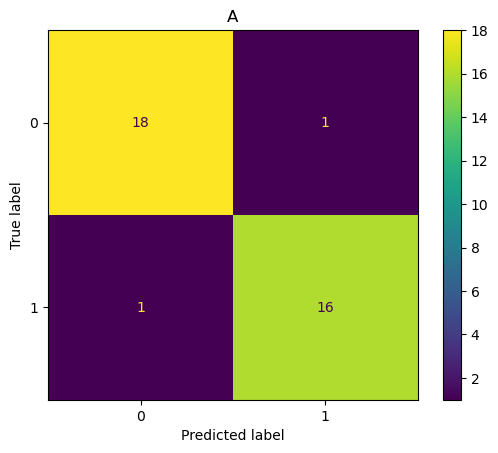

In [103]:
conf_mat = confusion_matrix(test_nonsep_y,pred_nonsep,labels=clf.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=conf_mat,display_labels=clf.classes_)
display.plot()
plt.title('A')

In [106]:
# nonsep case
# varied train set size
splits = [split1,split2, train_sample_size]
accuracies = []
f1s = []
precisions = []
recalls = []

for split in splits:
    sample_indices = train_nonsep_X.sample(split).index
    train_X = train_nonsep_X.loc[sample_indices]
    train_y = train_nonsep_y.loc[sample_indices]
    test_X = test_nonsep_X
    test_y = test_nonsep_y

    clf = SVC(kernel='linear',C=1)
    clf.fit(train_X, train_y)
    pred_nonsep = clf.predict(test_X)

    acc = accuracy_score(test_y, pred_nonsep)
    accuracies.append(acc)
    f1 = f1_score(test_y, pred_nonsep, pos_label=0)
    f1s.append(f1)
    prec = precision_score(test_y,pred_nonsep, pos_label=0)
    precisions.append(prec)
    rec = recall_score(test_y,pred_nonsep, pos_label=0)
    recalls.append(rec)

summary = pd.DataFrame([splits,accuracies,f1s, precisions, recalls]).T
summary.columns = ['#Training samples','Accuracy','F1 score','Precision','Recall']
summary

#Training samples  Accuracy  F1 score  Precision    Recall
0               60.0  0.972222  0.972973        1.0  0.947368
1               84.0  0.916667  0.914286        1.0  0.842105
2               36.0  0.916667  0.923077        0.9  0.947368

Text(0.5, 1.0, 'A')

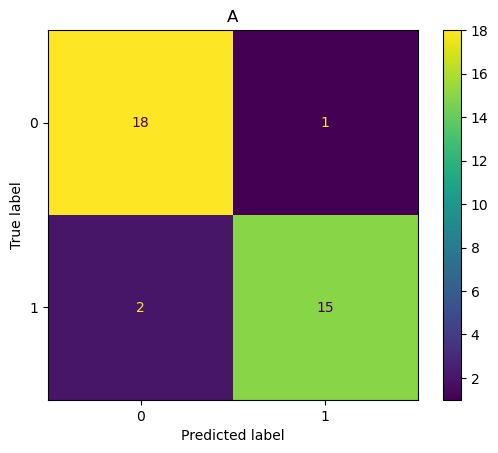

In [107]:
conf_mat = confusion_matrix(test_nonsep_y,pred_nonsep,labels=clf.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=conf_mat,display_labels=clf.classes_)
display.plot()
plt.title('A')

In [95]:
# let's study the effect of the no of PCs here
no_pcs =[2,3,5,10,20,50,100]
accuracies = []
f1s = []
precisions = []
recalls = []

pos_label = 2


for npc in no_pcs:
    # train_nonsep_X, test_nonsep_X, train_nonsep_y, test_nonsep_y = train_test_split(nonsep_data.iloc[:,:npc], nonsep_data.target, test_size=0.3,random_state=4)

    # sc = StandardScaler()
    # sc_train_nonsep_X = sc.fit_transform(train_nonsep_X)
    # sc_test_nonsep_X = sc.transform(test_nonsep_X)

    clf = SVC(kernel='linear', C=0.01)
    clf.fit(sc_train_nonsep_X[:,0:npc],train_nonsep_y)
    pred_nonsep = clf.predict(sc_test_nonsep_X[:,0:npc])

    acc = accuracy_score(test_nonsep_y, pred_nonsep)
    accuracies.append(acc)
    f1 = f1_score(test_nonsep_y, pred_nonsep, pos_label=0)
    f1s.append(f1)
    prec = precision_score(test_nonsep_y,pred_nonsep, pos_label=0)
    precisions.append(prec)
    rec = recall_score(test_nonsep_y,pred_nonsep, pos_label=0)
    recalls.append(rec)

summary = pd.DataFrame([no_pcs,accuracies,f1s, precisions, recalls]).T
summary.columns = ['#PCs','Accuracy','F1 score','Precision','Recall']
summary

c:\Users\Andrew\anaconda3\envs\DL_libraries\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#PCs  Accuracy  F1 score  Precision    Recall
0    2.0  0.472222  0.000000   0.000000  0.000000
1    3.0  0.694444  0.645161   0.833333  0.526316
2    5.0  0.916667  0.923077   0.900000  0.947368
3   10.0  0.972222  0.972973   1.000000  0.947368
4   20.0  1.000000  1.000000   1.000000  1.000000
5   50.0  0.916667  0.918919   0.944444  0.894737
6  100.0  0.916667  0.923077   0.900000  0.947368

In [96]:
# nonsep case
# examine effect of gamme, use rbf kernel
gammas = [0.001,0.01,0.1,1,3,5,10]
accuracies = []
f1s = []
precisions = []
recalls = []

for gamma in gammas:
    clf = SVC(kernel='rbf', C=1, gamma=gamma)
    clf.fit(sc_train_nonsep_X,train_nonsep_y)
    pred_nonsep = clf.predict(test_nonsep_X)

    acc = accuracy_score(test_nonsep_y, pred_nonsep)
    accuracies.append(acc)
    f1 = f1_score(test_nonsep_y, pred_nonsep, pos_label=0)
    f1s.append(f1)
    prec = precision_score(test_nonsep_y,pred_nonsep, pos_label=0)
    precisions.append(prec)
    rec = recall_score(test_nonsep_y,pred_nonsep, pos_label=0)
    recalls.append(rec)

summary = pd.DataFrame([gammas,accuracies,f1s, precisions, recalls]).T
summary.columns = ['Gamma','Accuracy','F1 score','Precision','Recall']
summary


c:\Users\Andrew\anaconda3\envs\DL_libraries\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Andrew\anaconda3\envs\DL_libraries\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Andrew\anaconda3\envs\DL_libraries\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Andrew\anaconda3\envs\DL_libraries\lib\site-packages

Gamma  Accuracy  F1 score  Precision  Recall
0   0.001  0.527778  0.690909   0.527778     1.0
1   0.010  0.527778  0.690909   0.527778     1.0
2   0.100  0.472222  0.000000   0.000000     0.0
3   1.000  0.472222  0.000000   0.000000     0.0
4   3.000  0.472222  0.000000   0.000000     0.0
5   5.000  0.472222  0.000000   0.000000     0.0
6  10.000  0.472222  0.000000   0.000000     0.0

In [97]:
pred_nonsep
# rbf kernel seems to think that there is only one label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [98]:
clf.confusino

AttributeError: 'SVC' object has no attribute 'confusino'

In [ ]:
# study effect of no of PCs

In [ ]:
stop

NameError: name 'stop' is not defined

## Polynomial

In [ ]:
# polynomial kernel PCA
# n_components=2
# kpca = KernelPCA(kernel='poly', degree=3, n_components=n_components)
# kpc_poly_intensities = kpca.fit_transform(sc_intensities)


In [ ]:
# summary for poly
comps = [200]#,3,5,20,50,100,150,200,240] # 10,15,20,25
# variances = []
degree = 4
for n_c in comps:
    kpca = KernelPCA(kernel='poly', n_components=None, degree=degree) # default degree is 3
    poly_x = kpca.fit_transform(sc_intensities)

    expl_var = np.var(poly_x, axis=0)
    variances  = expl_var / np.sum(expl_var)
    
    
    # variances.append(expl_var_ratio) # FIX

summary = pd.DataFrame([np.arange(1,variances.shape[0]+1), variances]).T
summary.columns = ['n_components','total_var']
summary

In [ ]:
fig, ax = plt.subplots()
size=12
ax.plot(summary.n_components, summary.total_var, marker='^', markersize=2)

ax.set_title('Scree Plot for Polynomial PCA (degree={})'.format(degree), fontsize=size+2)
ax.set_xlabel('Number of components', fontsize=size)
ax.set_ylabel('Explained variance per PC', fontsize=size)

ax.set_xlim(0,summary.n_components.max())
ax.set_ylim(0, summary.total_var.max())

In [ ]:
fig, ax = plt.subplots()
size=12
ax.plot(summary.n_components, np.cumsum(summary.total_var), marker='^', markersize=2)

ax.set_title('Scree Plot for Polynomial PCA (degree={})'.format(degree), fontsize=size+2)
ax.set_xlabel('Number of components', fontsize=size)
ax.set_ylabel('Total explained variance', fontsize=size)

ax.set_xlim(0,sc_intensities.shape[0])
ax.set_ylim(summary.total_var[0],1)

In [ ]:
np.cumsum(summary.total_var)

In [ ]:
fig, ax = plt.subplots()
size = 12
ix = 0
iy = 1

scat = ax.scatter(poly_x[:,ix],poly_x[:,iy], c=y)
ax.legend(scat.legend_elements()[0], le.classes_)
ax.set_title('Loadings - Polynomial PCA (degree={})'.format(degree), fontsize=size+2)

ax.set_xlabel('PC'+str(ix+1), fontsize=size)
ax.set_ylabel('PC'+str(iy+1), fontsize=size)

# ax.set_xlim(-1,2.2)
# ax.set_ylim(-3,2)

plt.show()

# lemon and lime are not very separable - makes sense
# show in report perhaps

## RBF

In [ ]:
# summary for poly
comps = [200]#,3,5,20,50,100,150,200,240] # 10,15,20,25
# variances = []
for n_c in comps:
    kpca = KernelPCA(kernel='rbf', n_components=None)
    rbf_x = kpca.fit_transform(sc_intensities)

    expl_var = np.var(rbf_x, axis=0)
    variances  = expl_var / np.sum(expl_var)
    
    
    # variances.append(expl_var_ratio) # FIX

summary = pd.DataFrame([np.arange(1,variances.shape[0]+1), variances]).T
summary.columns = ['n_components','total_var']
summary

In [ ]:
fig, ax = plt.subplots()
size=12
ax.plot(summary.n_components, summary.total_var, marker='o', markersize=2)

ax.set_title('Scree Plot for RBF PCA', fontsize=size+2)
ax.set_xlabel('Number of components', fontsize=size)
ax.set_ylabel('Explained variance per PC', fontsize=size)

ax.set_xlim(0,summary.n_components.max())
ax.set_ylim(0, summary.total_var.max())

In [ ]:
fig, ax = plt.subplots()
size=12
ax.plot(summary.n_components, np.cumsum(summary.total_var), marker='^', markersize=2)

ax.set_title('Scree Plot for RBF PCA', fontsize=size+2)
ax.set_xlabel('Number of components', fontsize=size)
ax.set_ylabel('Total explained variance', fontsize=size)

ax.set_xlim(0,sc_intensities.shape[0])
ax.set_ylim(summary.total_var[0],1)

In [ ]:
fig, ax = plt.subplots()
size = 12
ix = 1
iy = 2

scat = ax.scatter(rbf_x[:,ix],rbf_x[:,iy], c=y)
ax.legend(scat.legend_elements()[0], le.classes_)
ax.set_title('Loadings - RBF PCA'.format(degree), fontsize=size+2)

ax.set_xlabel('PC'+str(ix+1), fontsize=size)
ax.set_ylabel('PC'+str(iy+1), fontsize=size)

# ax.set_xlim(-1,2.2)
# ax.set_ylim(-3,2)

plt.show()

# lemon and lime are not very separable - makes sense
# show in report perhaps